In [33]:
import tweepy
import re

In [34]:
import configparser
import csv
import pandas as pd
import datetime
from textblob import TextBlob

In [35]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import display, HTML
import numpy as np
import collections
import json
from wordcloud import WordCloud

In [36]:
api_key= 'VXzRzW62biX8KW7A4XycqIeCL'
api_key_secret='Dr1ak1sdfL2CdpGCp2IWYg3xbOYFWmJ2H3Tm6ZkgMPo5ejqBrY'
access_token='78477561-2SitfsaoG4zvrq5jk1oMGahSgtBvQ9b7noe1XNNSX'
access_token_secret='vYNqoq4IrLpRINUQdn06aAWaeoSz7G3PNNSSt23XIlx1F'

In [37]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

In [38]:
api = tweepy.API(auth, wait_on_rate_limit = True)

In [39]:
tweets=api.search_tweets(q="#ukraine", count=500, result_type="recent", lang="en", tweet_mode="extended")

In [40]:
columns = ['Time', 'User', 'Tweet']
data = []
for tweet in tweets:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.full_text])


In [63]:
df = pd.DataFrame(data, columns=columns)
df.to_csv('/Users/mukulkajla/Downloads/Twitter.csv')

In [64]:
tweets_df = pd.read_csv('/Users/mukulkajla/Downloads/Twitter.csv')

In [65]:
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweets_df['Tweet'].apply(hashtag_pattern.findall))

In [66]:
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [67]:
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]


In [68]:
hashtag_ordered_values = []
hashtag_ordered_keys = []

In [69]:
for item in hashtag_ordered_list[0:40]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

In [48]:
hashtag_ordered_keys

['#Ukraine',
 '#UkraineRussiaWar',
 '#MINT',
 '#Ukrainian',
 '#Belarus',
 '#Russia',
 '#Mariupol',
 '#NATO',
 '#ukraine',
 '#US',
 '#Kyiv',
 '#Putin',
 '#UkraineUnderAtta',
 '#UkraineRussianWar',
 '#RussianUkrainianWar',
 '#Russian',
 '#Ecuador',
 '#Hakodate',
 '#UN',
 '#ICTR',
 '#sendinthetroops',
 '#StopPutin',
 '#RussiaUkraineConflict',
 '#RussiaUkraine',
 '#business',
 '#NewYork',
 '#networking',
 '#Kharkiv',
 '#DIOZPL',
 '#Lutsk',
 '#Military',
 '#Pfizer',
 '#Romania',
 '#Uk',
 '#ARMY',
 '#Ukriane',
 '#kiev',
 '#BLACKANCESTORS',
 '#Azov',
 '#NAZIUKRAINE']

In [49]:
keywords = hashtag_ordered_keys

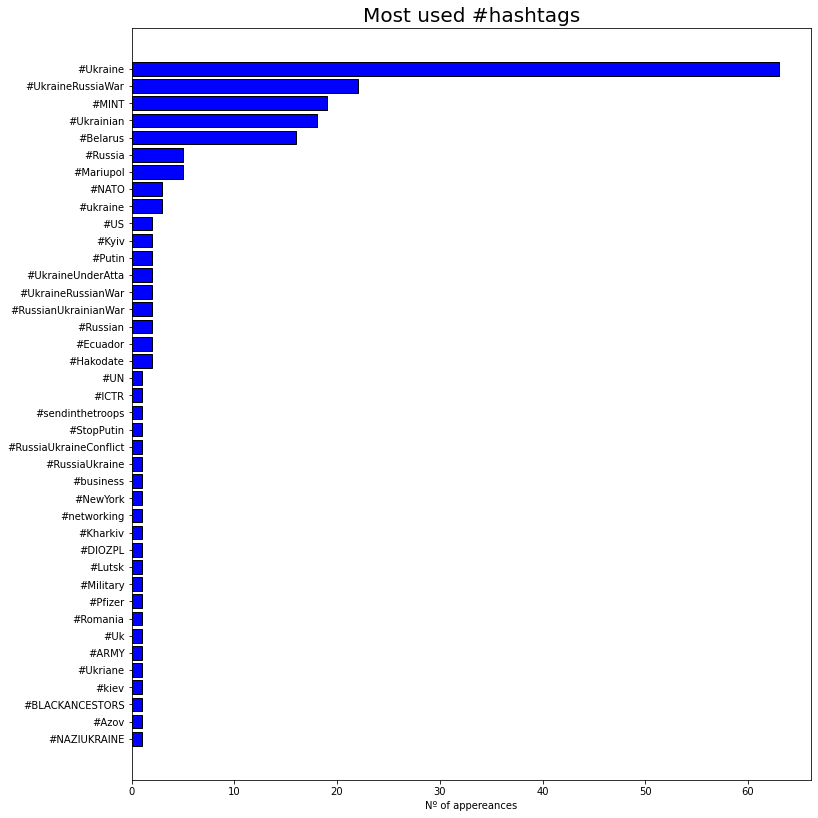

In [50]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'blue', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

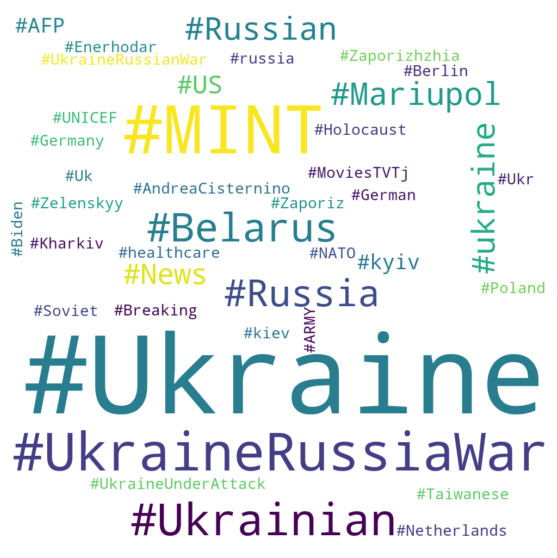

In [71]:
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:40]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [52]:
tweets_df

,Unnamed: 0,Time,User,Tweet
0,0,2022-03-31 02:40:17+00:00,cityxsquare,RT @againstwar_nfts: No one wins war.\nStand a...
1,1,2022-03-31 02:40:17+00:00,c_e_jensen,RT @GlasnostGone: My thanks for all your suppo...
2,2,2022-03-31 02:40:16+00:00,bigwin_minjjx,RT @againstwar_nfts: No one wins war.\nStand a...
3,3,2022-03-31 02:40:16+00:00,PP__NL,RT @asianewsteam: BamBam spotted at Incheon In...
4,4,2022-03-31 02:40:16+00:00,yakinbgtbigwin,RT @againstwar_nfts: No one wins war.\nStand a...
...,...,...,...,...
95,95,2022-03-31 02:39:02+00:00,obrijo,RT @MrKovalenko: Seven busses packed with Russ...
96,96,2022-03-31 02:39:01+00:00,JaK7ltqoq3HJKFq,RT @GordonGChang: #Russia’s invasion of #Ukrai...
97,97,2022-03-31 02:39:01+00:00,REALaltMiddle,RT @MrKovalenko: Seven busses packed with Russ...
98,98,2022-03-31 02:39:00+00:00,kevjhnsn,RT @MrKovalenko: Seven busses packed with Russ...


In [53]:
vader = SentimentIntensityAnalyzer()
def sentiment(text):
    score = vader.polarity_scores(text)['compound']
    if score > 0.5:
        return 'very positive'
    elif score > 0 and score <= 0.5:
        return 'positive'
    elif score < 0 and score >= -0.5:
        return 'negative'
    elif score < -0.5 :
        return 'very negative'
    else:
        return 'neutral'

In [54]:
tweets_df = pd.read_csv('/Users/mukulkajla/Downloads/Twitter.csv')

In [55]:
tweets_df.count()

Unnamed: 0    100
Time          100
User          100
Tweet         100
dtype: int64

In [56]:
tweets_df['Tweet']

0     RT @ronzheimer: Just now in central Kyiv. #Ukr...
1     RT @sirajnoorani: Tank T-34 at the memorial to...
2     RT @EstonianWorld: Estonian service lets you e...
3     RT @markito0171: Fierce battle between Kadyrov...
4     RT @AbdAlsalaam17: The US Under Secretary of S...
                            ...                        
95    RT @qwolphin: Media reports that there are wou...
96    RT @Militarylandnet: ✍️The 35th day of Russian...
97    RT @diako_n1: A veterinary clinic on the Polis...
98    RT @againstwar_nfts: No one wins war.\nStand a...
99    RT @MrKovalenko: Seven busses packed with Russ...
Name: Tweet, Length: 100, dtype: object

In [57]:
tweet_data = tweets_df['Tweet']

In [58]:
tweets_df_new = tweets_df

In [59]:
tweet_data

0     RT @ronzheimer: Just now in central Kyiv. #Ukr...
1     RT @sirajnoorani: Tank T-34 at the memorial to...
2     RT @EstonianWorld: Estonian service lets you e...
3     RT @markito0171: Fierce battle between Kadyrov...
4     RT @AbdAlsalaam17: The US Under Secretary of S...
                            ...                        
95    RT @qwolphin: Media reports that there are wou...
96    RT @Militarylandnet: ✍️The 35th day of Russian...
97    RT @diako_n1: A veterinary clinic on the Polis...
98    RT @againstwar_nfts: No one wins war.\nStand a...
99    RT @MrKovalenko: Seven busses packed with Russ...
Name: Tweet, Length: 100, dtype: object

In [60]:
tweets_df_new['Sentiment'] = tweets_df_new['Tweet'].apply(sentiment)

In [61]:
tweets_df_new

,Unnamed: 0,Time,User,Tweet,Sentiment
0,0,2022-03-31 03:07:16+00:00,BU7dtPifkN79pnK,RT @ronzheimer: Just now in central Kyiv. #Ukr...,neutral
1,1,2022-03-31 03:07:15+00:00,davidwjohns1111,RT @sirajnoorani: Tank T-34 at the memorial to...,neutral
2,2,2022-03-31 03:07:15+00:00,HumboldtBunny,RT @EstonianWorld: Estonian service lets you e...,very negative
3,3,2022-03-31 03:07:14+00:00,ukrainianglory,RT @markito0171: Fierce battle between Kadyrov...,negative
4,4,2022-03-31 03:07:14+00:00,Danny51353649,RT @AbdAlsalaam17: The US Under Secretary of S...,positive
...,...,...,...,...,...
95,95,2022-03-31 03:05:54+00:00,Think_Kyiv,RT @qwolphin: Media reports that there are wou...,negative
96,96,2022-03-31 03:05:53+00:00,JosefWiederkehr,RT @Militarylandnet: ✍️The 35th day of Russian...,neutral
97,97,2022-03-31 03:05:52+00:00,DogsofYulin,RT @diako_n1: A veterinary clinic on the Polis...,negative
98,98,2022-03-31 03:05:52+00:00,kamvret01do,RT @againstwar_nfts: No one wins war.\nStand a...,very negative


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

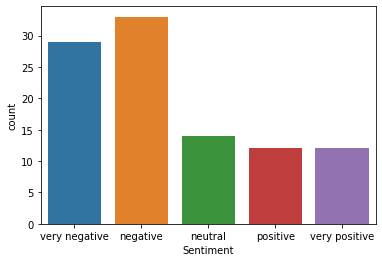

In [62]:
sns.countplot(x = 'Sentiment',  data = tweets_df_new, order = ['very negative', 'negative', 'neutral', 'positive', 'very positive'])